In [1]:
# Numerical Integration Algorithum
import warnings
warnings.filterwarnings("ignore")

import numpy as np

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ODEPlotter import *

def f(x):
    return -2*x


def Euler(x_0, t_0, Func, tmax, dt):
    r"""Some function

    Plot the graph x against t.
    Does some stuff.

    Parameters
    ----------
    x_0 : int
        The x value at t_0
    t_0 : str
        The time the trajectory starts
    Func : Function
        The derivative dx/dt
    tmax : float
        The max time reached
    dt : float
        The width of intervals

    Returns
    -------
    tuple
        the t values and their corresponding x positions

    """
    # Number of time steps:
    N = int((tmax-t_0)//dt)

    x = np.zeros(N)
    t = np.zeros(N)

    x[0] = x_0
    t[0] = t_0

    # Let's integrate our ODE
    for n in range(0, N-1):
        t[n+1] = t[n] + dt
        x[n+1] = x[n] + Func(x[n])*dt
        
    return (t,x)

In [2]:
def RungeKutta(T, dt, t_0, x_0):
    N = int(np.trunc(T/dt))
    t = np.zeros(N)
    num_x = len(x_0)
    x = np.zeros([N, num_x])

    # Initial Conditions
    x[0] = x_0
    t[0] = t_0

    for n in range(0, N-1):
        k1 = dt*f(t[n], *x[n])
        k2 = dt*f(t[n]+dt/2, *(x[n]+k1/2))
        k3 = dt*f(t[n]+dt/2, *(x[n]+k2/2))
        k4 = dt*f(t[n]+dt, *(x[n]+k3))

        x[n+1] = x[n] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        t[n+1] = t[n] + dt

    return t, x

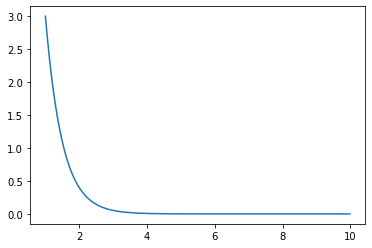

In [3]:
plt.plot(*Euler(3,1, f, 10,0.01))

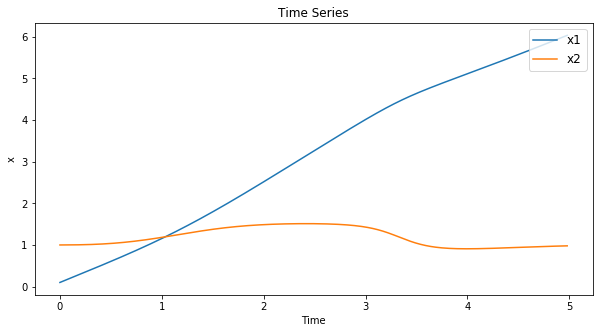

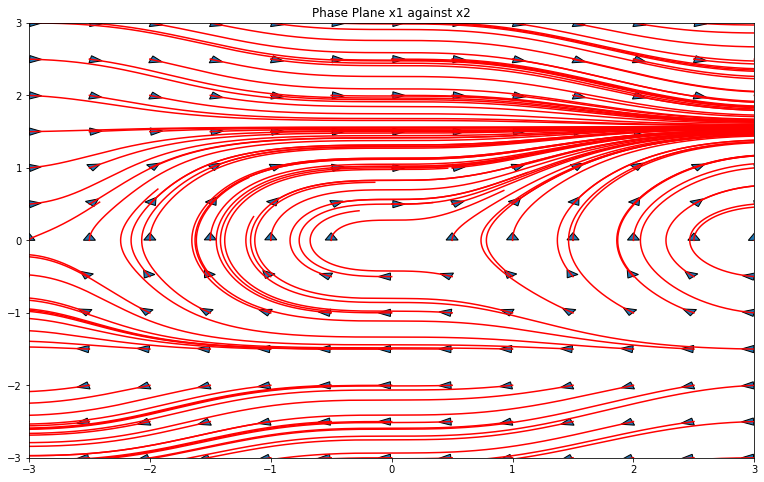

In [4]:
# 2D testing graphs
ODE = ODEPlotter()
ODE.PlotTimeSeries(5,0,[0.1,1])
ODE.PlotPhasePlane([-3,3],[-3,3],5)

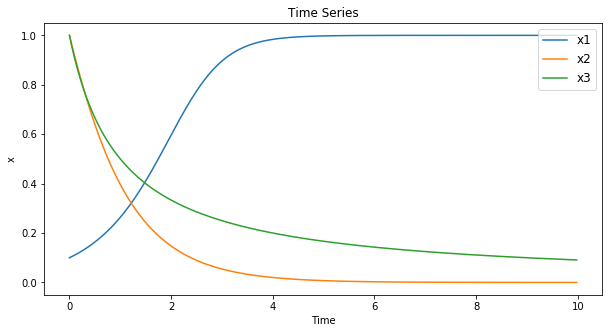

TypeError: examplefunc2() missing 1 required positional argument: 'x3'

<Figure size 936x576 with 0 Axes>

In [5]:
# 3D testing
def examplefunc2(t, x1, x2, x3):
    f1 = x1-x1**3
    f2 = -np.sin(x2)
    f3 = -x3**2
    return np.array([f1, f2, f3])

ODE = ODEPlotter(examplefunc2)
ODE.PlotTimeSeries(10,0,[0.1,1,1])
ODE.PlotPhasePlane([-2,2],[-2,2],5) # Need restrictions


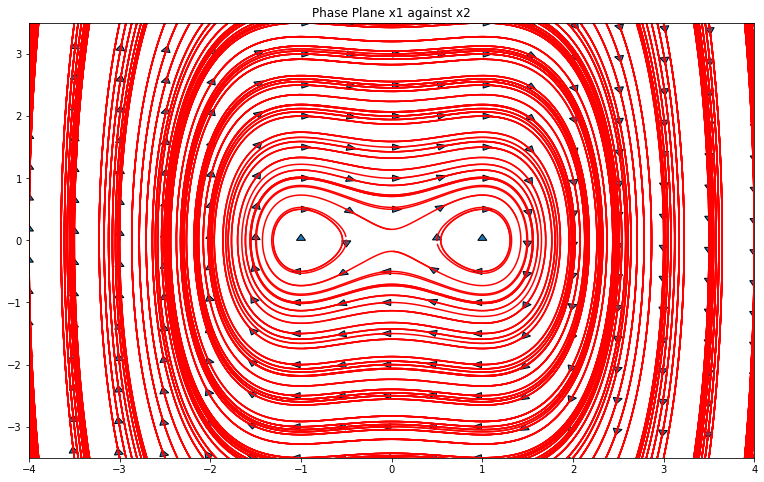

In [6]:
def examplefunc3(t, x1, x2):
    f1 = x2
    f2 = x1-x1**3
    f3 = 0
    return np.array([f1, f2])

ODE = ODEPlotter(examplefunc3)
ODE.PlotPhasePlane([-4,4],[-3.5,3.5],5)

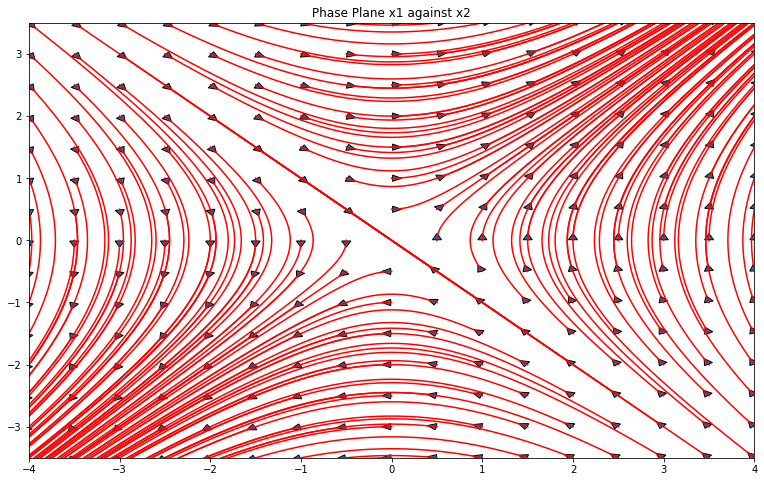

In [7]:
def examplefunc4(t, x1, x2):
    f1 = 1*x2
    f2 = 1*x1
    f3 = 0
    return np.array([f1, f2])

ODE = ODEPlotter(examplefunc4)
ODE.PlotPhasePlane([-4,4],[-3.5,3.5],5)

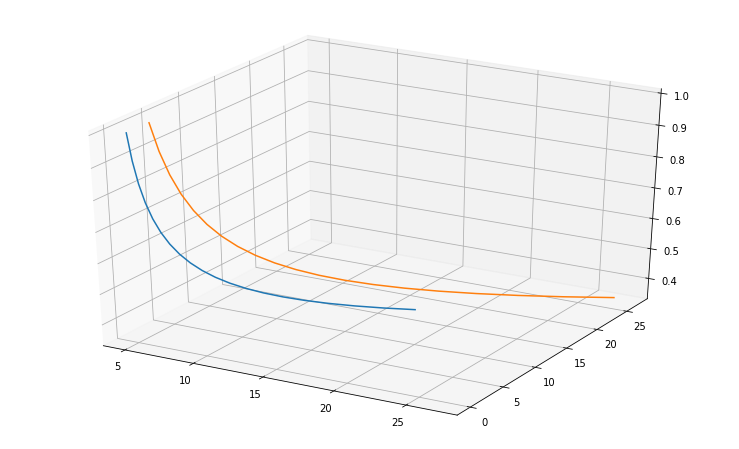

In [8]:
#3D testing
def examplefunc5(t, x1, x2, x3):
    f1 = 1*x2
    f2 = 1*x1
    f3 = -x3**2
    return np.array([f1, f2, f3])

def RungeKutta(T, dt, t_0, x_0):
    N = int(np.trunc(T/dt))
    t = np.zeros(N)
    num_x = len(x_0)
    x = np.zeros([N, num_x])

    # Initial Conditions
    x[0] = x_0
    t[0] = t_0
    
    f = examplefunc5

    for n in range(0, N-1):
        k1 = dt*f(t[n], *x[n])
        k2 = dt*f(t[n]+dt/2, *(x[n]+k1/2))
        k3 = dt*f(t[n]+dt/2, *(x[n]+k2/2))
        k4 = dt*f(t[n]+dt, *(x[n]+k3))

        x[n+1] = x[n] + (1/6)*(k1 + 2*k2 + 2*k3 + k4)
        t[n+1] = t[n] + dt

    return t, x

t, x, = RungeKutta(2, 0.1, 0, [5,0,1])
fig = plt.figure(figsize=(13,8))
ax = fig.gca(projection = '3d')
ax.plot(x[:,0], x[:, 1], x[:,2])

t, x, = RungeKutta(2, 0.1, 0, [5,3,1])
ax.plot(x[:,0], x[:, 1], x[:,2])

plt.show()

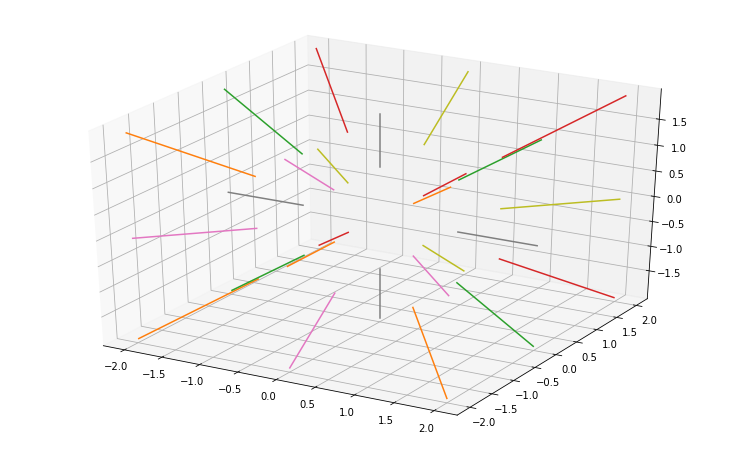

In [9]:
#3D testing
def examplefunc5(t, x1, x2, x3):
    f1 = 1*x1
    f2 = 1*x2
    f3 = x3
    return np.array([f1, f2, f3])

ODE = ODEPlotter(examplefunc5)
ODE.PlotPhaseSpace3D([-2,2],[-2,2],[-2,2],5, gap = 1)

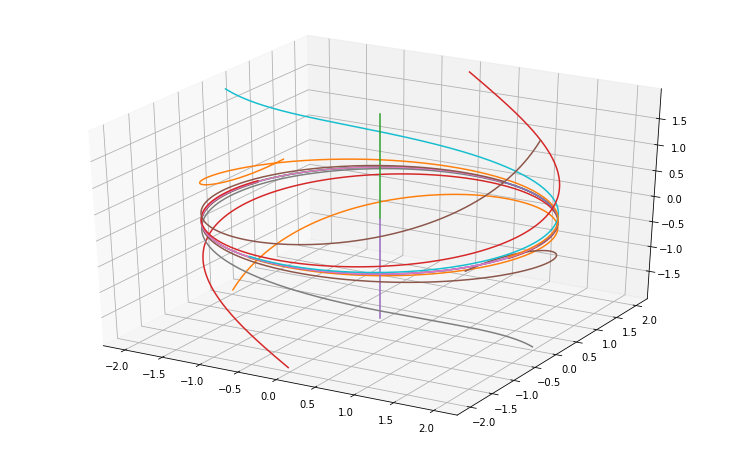

In [10]:
#3D testing
def examplefunc6(t, x1, x2, x3):
    f1 = 1*x2
    f2 = -1*x1
    f3 = -x3
    return np.array([f1, f2, f3])

ODE = ODEPlotter(examplefunc6)
ODE.PlotPhaseSpace3D([-2,2],[-2,2],[-2,2],5, gap = 2)